In [4]:
# Victor Z and David Cole
# UW-Madison, 2024
# generator sizing example
# explore conflict resolution (mean vs. variance)

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Function Definitions

# Combined risk measure
def myfun(u, X, kappa):
    rho1 = myfun1(u, X)
    rho2 = myfun2(u, X)
    return rho1 + kappa * rho2

# Risk measure 1
def myfun1(u, X):
    R = np.maximum(X - u, 0)
    y = 5 * (R**2) + 15 * u**2
    return np.mean(y)

# Risk measure 2
def myfun2(u, X):
    R = np.maximum(X - u, 0)
    y = 5 * (R**2) + 15 * u**2
    return np.std(y)

# CVaR
def myfun3(u, X, alpha):
    R = np.maximum(X - u, 0)
    y = 5 * (R**2) + 15 * u**2
    Q = np.quantile(y, alpha)
    loc = y >= Q
    return np.mean(y[loc])

In [2]:
# Generate scenarios for random load
np.random.seed(0)
N = 1000
X = np.random.weibull(2, N) * 10

lb = 0
ub = 10
u0 = 1
kappa = np.arange(0, 16)

opt = {'disp': True}

u = []
rho1 = []
rho2 = []

for k in kappa:
    result = minimize(myfun, u0, args=(X, k), bounds=[(lb, ub)], method='SLSQP', options=opt)
    u_k = result.x[0]
    u.append(u_k)
    rho1.append(myfun1(u_k, X))
    rho2.append(myfun2(u_k, X))

Optimization terminated successfully    (Exit mode 0)
            Current function value: 403.811327464453
            Iterations: 3
            Function evaluations: 8
            Gradient evaluations: 3
Optimization terminated successfully    (Exit mode 0)
            Current function value: 796.0603264747213
            Iterations: 3
            Function evaluations: 7
            Gradient evaluations: 3
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1144.0125545778988
            Iterations: 3
            Function evaluations: 7
            Gradient evaluations: 3
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1452.8150932934652
            Iterations: 4
            Function evaluations: 9
            Gradient evaluations: 4
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1727.9892794476066
            Iterations: 4
            Function evaluations: 8
    

Optimization terminated successfully    (Exit mode 0)
            Current function value: 403.811327464453
            Iterations: 3
            Function evaluations: 8
            Gradient evaluations: 3
Optimization terminated successfully    (Exit mode 0)
            Current function value: 439.72151069790425
            Iterations: 2
            Function evaluations: 6
            Gradient evaluations: 2
Optimization terminated successfully    (Exit mode 0)
            Current function value: 481.6400092530587
            Iterations: 2
            Function evaluations: 6
            Gradient evaluations: 2
Optimization terminated successfully    (Exit mode 0)
            Current function value: 530.0773152346565
            Iterations: 2
            Function evaluations: 6
            Gradient evaluations: 2
Optimization terminated successfully    (Exit mode 0)
            Current function value: 587.2913096999519
            Iterations: 2
            Function evaluations: 6
      

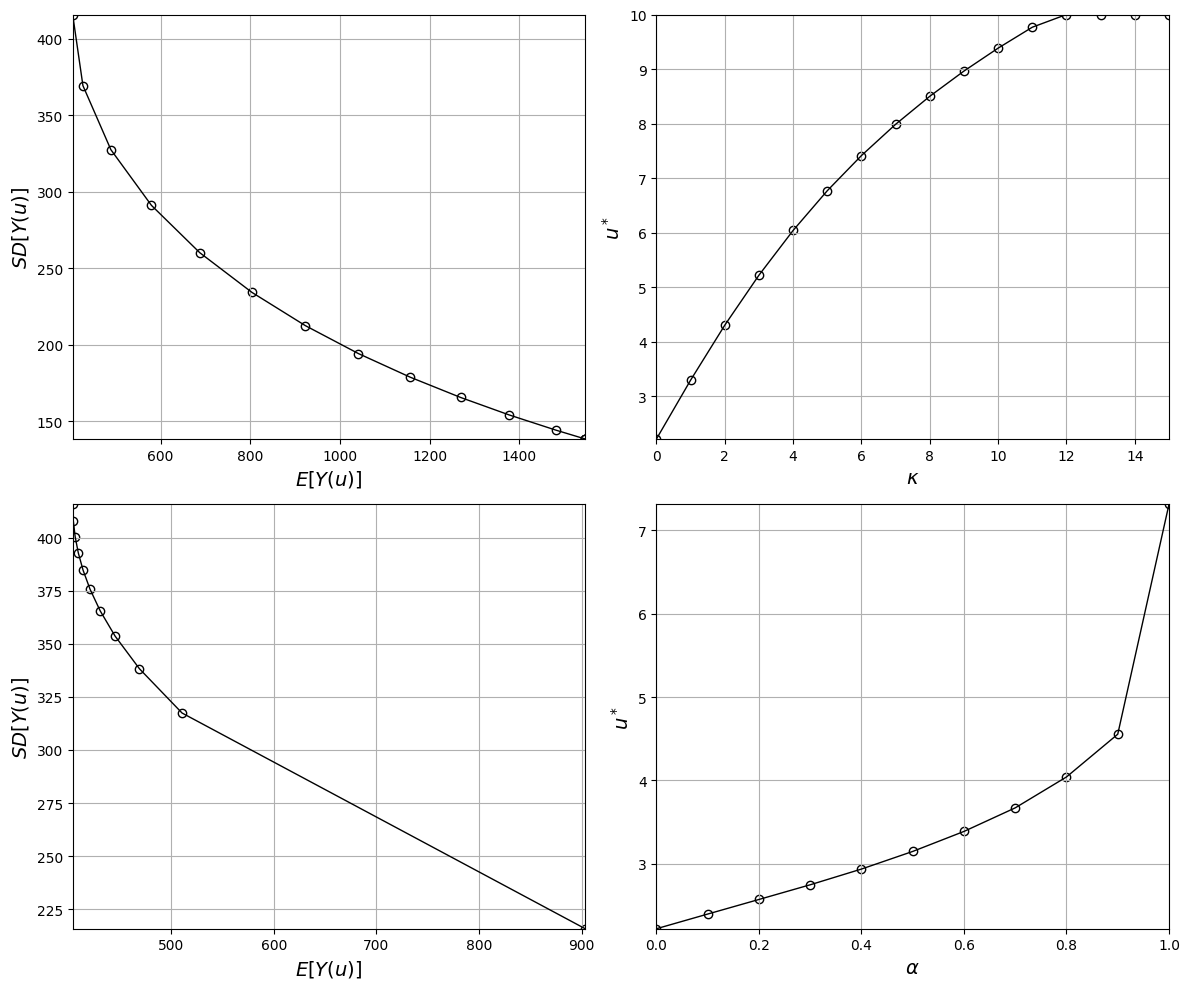

In [3]:
# Plot results
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].plot(rho1, rho2, linewidth=1, color='black', linestyle='-')
axs[0, 0].scatter(rho1, rho2, facecolors='w', edgecolors='black')
axs[0, 0].grid(True)
axs[0, 0].set_xlabel('$E[Y(u)]$', fontsize=14)
axs[0, 0].set_ylabel('$SD[Y(u)]$', fontsize=14)
axs[0, 0].axis([min(rho1), max(rho1), min(rho2), max(rho2)])

axs[0, 1].plot(kappa, u, linewidth=1, color='black', linestyle='-')
axs[0, 1].scatter(kappa, u, facecolors='w', edgecolors='black')
axs[0, 1].grid(True)
axs[0, 1].set_xlabel('$\\kappa$', fontsize=14)
axs[0, 1].set_ylabel('$u^*$', fontsize=14)
axs[0, 1].axis([min(kappa), max(kappa), min(u), max(u)])

# Span CVaR with alpha
alpha = np.arange(0, 1.1, 0.1)
u = []
rho1 = []
rho2 = []

for a in alpha:
    result = minimize(myfun3, u0, args=(X, a), bounds=[(lb, ub)], method='SLSQP', options=opt)
    u_a = result.x[0]
    u.append(u_a)
    rho1.append(myfun1(u_a, X))
    rho2.append(myfun2(u_a, X))
    u0 = u_a

axs[1, 0].plot(rho1, rho2, linewidth=1, color='black', linestyle='-')
axs[1, 0].scatter(rho1, rho2, facecolors='w', edgecolors='black')
axs[1, 0].grid(True)
axs[1, 0].set_xlabel('$E[Y(u)]$', fontsize=14)
axs[1, 0].set_ylabel('$SD[Y(u)]$', fontsize=14)
axs[1, 0].axis([min(rho1), max(rho1), min(rho2), max(rho2)])

axs[1, 1].plot(alpha, u, linewidth=1, color='black', linestyle='-')
axs[1, 1].scatter(alpha, u, facecolors='w', edgecolors='black')
axs[1, 1].grid(True)
axs[1, 1].set_xlabel('$\\alpha$', fontsize=14)
axs[1, 1].set_ylabel('$u^*$', fontsize=14)
axs[1, 1].axis([min(alpha), max(alpha), min(u), max(u)])

plt.tight_layout()
plt.show()